The KDD cup was an International Knowledge Discovery and Data Mining Tools Competition. In 1999, this competition was held with the goal of collecting traffic records. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between "bad" connections, called intrusions or attacks, and "good" normal connections. As a result of this competition, a mass amount of internet traffic records were collected and bundled into a data set called the KDD’99, and from this, the NSL-KDD data set was brought into existence, as a revised, cleaned-up version of the KDD’99 from the University of New Brunswick.
https://towardsdatascience.com/a-deeper-dive-into-the-nsl-kdd-data-set-15c753364657

In [2]:
#!/usr/bin/env python
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('Test_data.csv')

In [4]:
train_data_df = pd.DataFrame(train_data)
print(train_data_df.shape)

(25192, 42)


In [5]:
test_data_df = pd.DataFrame(test_data)
print(test_data_df.shape)

(22544, 41)


In [6]:
set(train_data_df).difference(set(test_data_df))

{'class'}

In [7]:
train_data_df = train_data_df[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes','dst_host_srv_serror_rate','logged_in', 'dst_host_same_src_port_rate', 'count','serror_rate','class','rerror_rate','num_outbound_cmds','is_host_login','is_guest_login' ]]

In [8]:
train_data_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,dst_host_srv_serror_rate,logged_in,dst_host_same_src_port_rate,count,serror_rate,class,rerror_rate,num_outbound_cmds,is_host_login,is_guest_login
0,0,tcp,ftp_data,SF,491,0,0.00,0,0.17,2,0.0,normal,0.0,0,0,0
1,0,udp,other,SF,146,0,0.00,0,0.88,13,0.0,normal,0.0,0,0,0
2,0,tcp,private,S0,0,0,1.00,0,0.00,123,1.0,anomaly,0.0,0,0,0
3,0,tcp,http,SF,232,8153,0.01,1,0.03,5,0.2,normal,0.0,0,0,0
4,0,tcp,http,SF,199,420,0.00,1,0.00,30,0.0,normal,0.0,0,0,0


In [9]:
train_data_df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

| field | continuous vs discrete | example | 
| --- | --- | --- |
| duration | continuous | | 
| protocol_type | discrete | tcp, udp, icmp |
| service | discrete | 66 values including http, private, domain_u, smtp, ftp_data, and so forth. |
| flag | discrete | 11 values including SF, S0, REJ, RSTR, and so forth. |
| src_bytes | continuous | |
| dst_bytes | continuous | |
| class | discrete | normal vs anomaly |

# Feature Engineering

In [10]:
def encodify(dataframe, feature):
    encoder = LabelEncoder()
    encoder.fit(dataframe[feature])
    encoded_feature = encoder.transform(dataframe[feature])
    dataframe[feature] = encoded_feature

In [11]:
discrete_feature_l = ['class','protocol_type','flag','service']
for feature in discrete_feature_l:
    encodify(train_data_df, feature)

# train-to-test spliteighty_cut_n = math.ceil(train_data_df.shape[0] * 0.8)
print(eighty_cut_n)

In [12]:
eighty_cut_n = math.ceil(train_data_df.shape[0] * 0.8)
print(eighty_cut_n)

20154


In [13]:
train_data_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,dst_host_srv_serror_rate,logged_in,dst_host_same_src_port_rate,count,serror_rate,class,rerror_rate,num_outbound_cmds,is_host_login,is_guest_login
0,0,1,19,9,491,0,0.00,0,0.17,2,0.0,1,0.0,0,0,0
1,0,2,41,9,146,0,0.00,0,0.88,13,0.0,1,0.0,0,0,0
2,0,1,46,5,0,0,1.00,0,0.00,123,1.0,0,0.0,0,0,0
3,0,1,22,9,232,8153,0.01,1,0.03,5,0.2,1,0.0,0,0,0
4,0,1,22,9,199,420,0.00,1,0.00,30,0.0,1,0.0,0,0,0


In [14]:
train_x = train_data_df.loc[:eighty_cut_n, ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes','dst_host_srv_serror_rate','logged_in', 'dst_host_same_src_port_rate', 'count','serror_rate','rerror_rate','num_outbound_cmds','is_host_login','is_guest_login' ]]
train_y = train_data_df.loc[:eighty_cut_n,'class']
test_x = train_data_df.loc[eighty_cut_n:, ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes','dst_host_srv_serror_rate','logged_in', 'dst_host_same_src_port_rate', 'count','serror_rate','rerror_rate','num_outbound_cmds','is_host_login','is_guest_login' ]]
test_y = train_data_df.loc[eighty_cut_n:, 'class']

In [15]:
train_data.shape

(25192, 42)

In [16]:
train_x.shape

(20155, 15)

In [17]:
test_x.shape

(5038, 15)

In [18]:
train_y.value_counts()

1    10775
0     9380
Name: class, dtype: int64

Text(0, 0.5, 'Frequency')

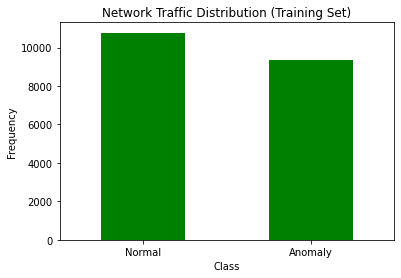

In [19]:
label_l = ['Normal', 'Anomaly']
classes = pd.value_counts(train_y, sort = True)
classes.plot(kind = 'bar', rot = 0, color = "green")
plt.title("Network Traffic Distribution (Training Set)")
plt.xticks(range(2), label_l)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [20]:
test_y.value_counts()

1    2675
0    2363
Name: class, dtype: int64

Text(0, 0.5, 'Frequency')

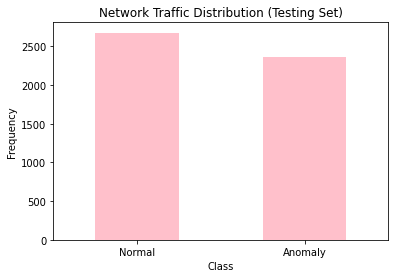

In [21]:
labels = ['Normal', 'Anomaly']
classes = pd.value_counts(test_y, sort = True)
classes.plot(kind = 'bar', rot = 0, color = "pink")
plt.title("Network Traffic Distribution (Testing Set)")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [22]:
train_x.isnull().any().sum()

0

In [23]:
train_y.isnull().any().sum()

0

In [24]:
test_x.isnull().any().sum()

0

In [25]:
test_y.isnull().any().sum()

0

# Modeling

## Random Forest

In [26]:
clf = RandomForestClassifier(max_depth = None).fit(train_x, train_y)

In [27]:
pred_test_y = clf.predict(test_x)
print(pred_test_y)

[1 1 1 ... 0 0 0]


In [28]:
accuracy_score(test_y, pred_test_y)

0.9980150853513299

In [29]:
confusion_matrix(test_y, pred_test_y)

array([[2355,    8],
       [   2, 2673]])

In [30]:
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_y).ravel()
print(f"accuracy is {(tp +tn)/(tn+fp+fn+tp)}")
print(f"precision is {tp / (tp + fp)}")
print(f"recall is {tp / (tp + fn)}")

accuracy is 0.9980150853513299
precision is 0.9970160387914957
recall is 0.9992523364485981


In [31]:
f1_score(test_y, pred_test_y, average='macro')

0.9980071454791711

# SVM

In [ ]:
param_grid = {'C': [0.5,0.1] ,'gamma': [0.05,0.01], 'kernel': ['linear','rbf']}
svc = svm.SVC()
nslkdd_svm_clf = GridSearchCV(svc,param_grid).fit(train_x, train_y)

In [ ]:
pred_test_y = nslkdd_svm_clf.predict(test_x)
print(pred_test_y)

In [ ]:
accuracy_score(test_y, pred_test_y)

In [ ]:
confusion_matrix(test_y, pred_test_y)

In [ ]:
tn, fp, fn, tp = confusion_matrix(test_y, pred_test_y).ravel()
print(f"accuracy is {(tp +tn)/(tn+fp+fn+tp)}")
print(f"precision is {tp / (tp + fp)}")
print(f"recall is {tp / (tp + fn)}")

In [ ]:
f1_score(test_y, pred_test_y, average='macro')